In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#  Load the traffic dataset into a DataFrame
import pandas as pd

#load csv file and read
df = pd.read_csv('traffic.csv')  # Example: 'traffic_data.csv'

#  View the first few rows
df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
#  Check the info about the dataset
df.info()

#Check if there are any missing values
df.isnull().sum()

# Quick basic stats about the data
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [4]:
#  Convert the 'DateTime' column from object to real datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

#  Check if it worked
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [5]:
#See total vehicles for each junction
df.groupby('Junction')['Vehicles'].sum().sort_values(ascending=False)


Junction
1    657412
2    207983
3    199823
4     31501
Name: Vehicles, dtype: int64

C:\Users\Apostle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


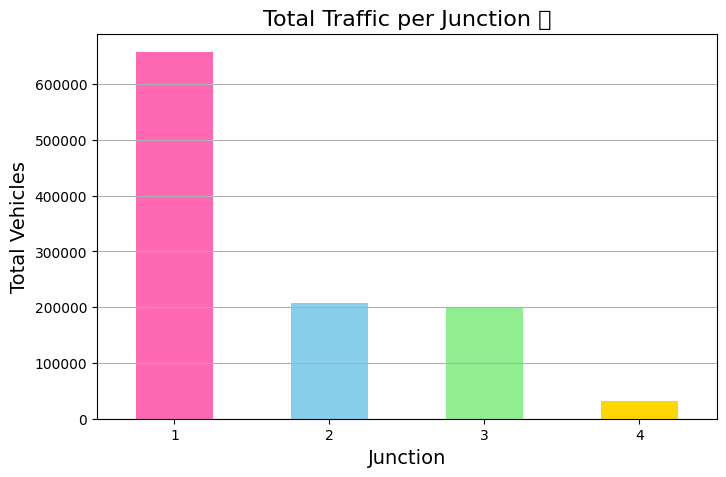

In [6]:
import matplotlib.pyplot as plt

# Grouping the traffic data by Junction and sorting to find the busiest ones
junction_traffic = df.groupby('Junction')['Vehicles'].sum().sort_values(ascending=False)

# Setting up the figure size to make the chart clearer
plt.figure(figsize=(8,5))

# Creating a bar plot to visualize total traffic per junction
junction_traffic.plot(kind='bar', color=['hotpink', 'skyblue', 'lightgreen', 'gold'])

# Adding a title and labels to make the graph look polished
plt.title('Total Traffic per Junction 🚗', fontsize=16)
plt.xlabel('Junction', fontsize=14)
plt.ylabel('Total Vehicles', fontsize=14)

# Making the x-axis labels horizontal for a cleaner look
plt.xticks(rotation=0)

# Adding a grid on the y-axis for better readability
plt.grid(axis='y')

# Displaying the final plot
plt.show()


C:\Users\Apostle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


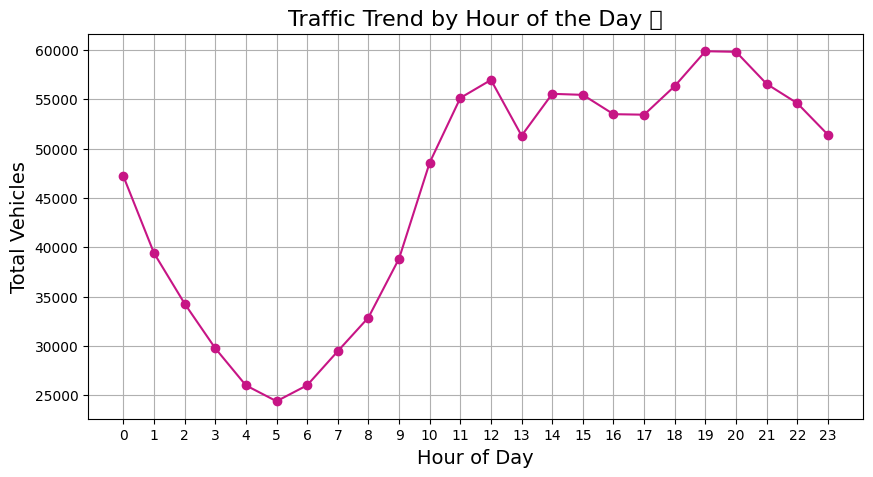

In [7]:
# Create a new column for the hour of the day
df['Hour'] = df['DateTime'].dt.hour

# Group by Hour and see total vehicles
hourly_traffic = df.groupby('Hour')['Vehicles'].sum()

# Plot traffic trend by hour
plt.figure(figsize=(10,5))
hourly_traffic.plot(kind='line', marker='o', color='mediumvioletred')
plt.title('Traffic Trend by Hour of the Day 🚦', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Total Vehicles', fontsize=14)
plt.grid()
plt.xticks(range(0,24))
plt.show()


In [8]:
# Sort hourly traffic to see the peak hours
peak_hours = hourly_traffic.sort_values(ascending=False)

# Show the top 10 peak hours
print(peak_hours.head(10))


Hour
19    59859
20    59799
12    56950
21    56547
18    56331
14    55544
15    55439
11    55128
22    54590
16    53482
Name: Vehicles, dtype: int64


In [ ]:

# Features = Hour, Junction
# Target = Vehicles (how many vehicles we expect)

X = df[['Hour', 'Junction']]  # features
y = df['Vehicles']  # target

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


: 